In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import pearsonr, spearmanr, kendalltau, norm
import seaborn as sns

dataset = pd.read_csv('carsb.csv')

In [2]:
# посмотрим на первые 10 строк
dataset.head(10)

,car_ID,CarName,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,alfa-romero giulia,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,1,alfa-romero stelvio,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,2,alfa-romero Quadrifoglio,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,3,audi 100 ls,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,4,audi 100ls,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,5,audi fox,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,6,audi 100ls,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,7,audi 5000,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,8,audi 4000,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,9,audi 5000s (diesel),0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
dataset = dataset.drop(columns=['CarName'])

In [4]:
dataset = dataset.drop(columns=['highwaympg'])

In [5]:
dataset = dataset.drop(columns=['citympg'])

In [6]:
dataset = dataset.drop(columns=['peakrpm'])

In [7]:
dataset = dataset.drop(columns=['compressionratio'])

In [8]:
dataset = dataset.drop(columns=['stroke'])

In [9]:
dataset = dataset.drop(columns=['car_ID'])
dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.972222,98.399444,173.352778,65.827222,53.522222,2546.033333,127.644444,3.322389,104.933333,13284.375928
std,1.179104,6.063155,12.512418,2.199539,2.483590,535.361684,43.700175,0.266499,40.383857,8318.977846
min,-1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000,5118.000000
25%,0.000000,94.500000,166.150000,64.000000,51.600000,2128.000000,97.000000,3.145000,70.000000,7609.000000
50%,1.000000,96.500000,173.100000,65.400000,53.700000,2412.000000,120.000000,3.330000,95.000000,10221.500000
75%,2.000000,101.200000,178.250000,66.500000,55.125000,2862.750000,146.000000,3.580000,120.250000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000,45400.000000


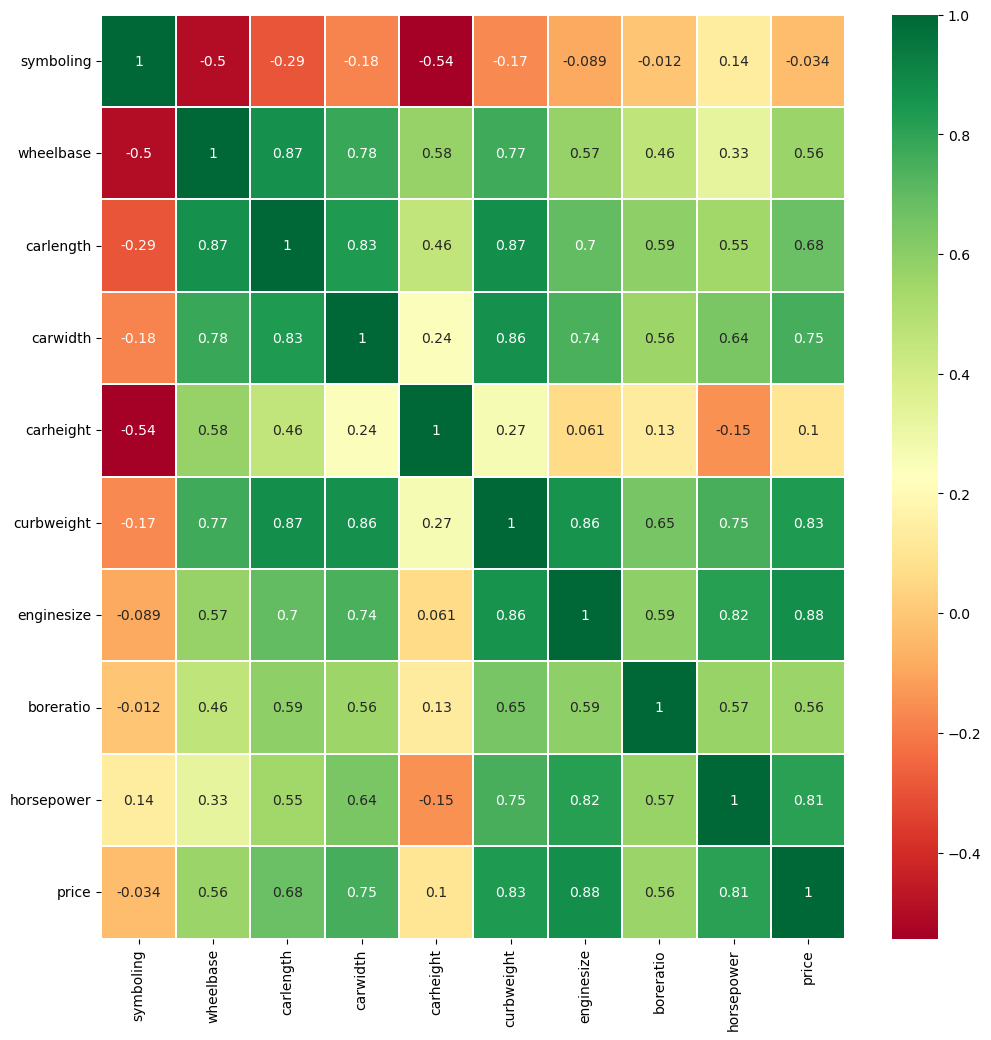

In [10]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,12)


Корреляция Пирсона: 
0.8123526813355696 1.5004194042523678e-43

Корреляция Спирмена: 
0.8660772835563556 1.739915600118573e-55

Корреляция Тау Кендалла: 
0.6869653155442804 1.410616892919307e-41


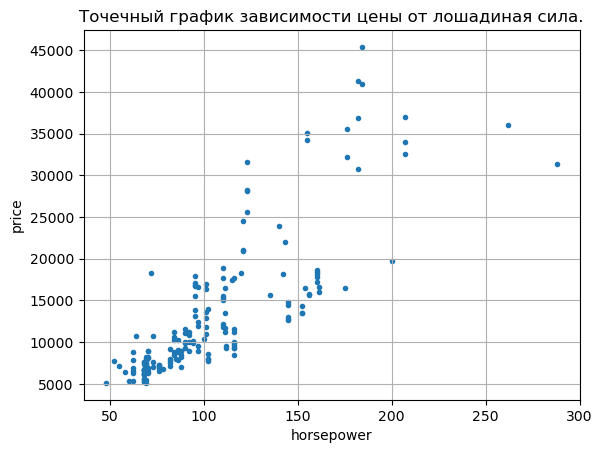

In [11]:
# смотрим зависимости цены от лошадиная сила
x = dataset['horsepower'].values
y = dataset['price'].values

plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Точечный график зависимости цены от лошадиная сила.')
plt.grid(True)
plt.scatter(x, y, marker='.')

print("\nКорреляция Пирсона: ")
corr, p_value = pearsonr(dataset['horsepower'], dataset['price'])
print(corr, p_value)

print("\nКорреляция Спирмена: ")
corr, p_value = spearmanr(dataset['horsepower'], dataset['price'])
print(corr, p_value)

print("\nКорреляция Тау Кендалла: ")
corr, p_value = kendalltau(dataset['horsepower'], dataset['price'])
print(corr, p_value)


Корреляция Пирсона: 
0.562462861315869 2.0909822913462546e-16

Корреляция Спирмена: 
0.6532693193942749 2.8166816447430865e-23

Корреляция Тау Кендалла: 
0.5098462492393557 1.9032372316663354e-23


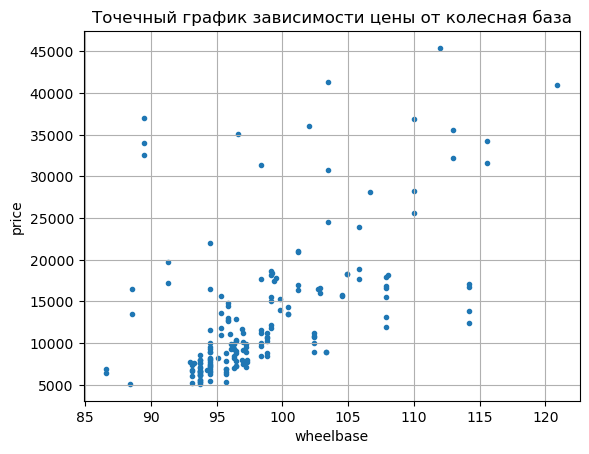

In [12]:
# смотрим зависимости цены от колесная база
x = dataset['wheelbase'].values
y = dataset['price'].values

plt.xlabel('wheelbase')
plt.ylabel('price')
plt.title('Точечный график зависимости цены от колесная база')
plt.grid(True)
plt.scatter(x, y, marker='.')

print("\nКорреляция Пирсона: ")
corr, p_value = pearsonr(dataset['wheelbase'], dataset['price'])
print(corr, p_value)

print("\nКорреляция Спирмена: ")
corr, p_value = spearmanr(dataset['wheelbase'], dataset['price'])
print(corr, p_value)

print("\nКорреляция Тау Кендалла: ")
corr, p_value = kendalltau(dataset['wheelbase'], dataset['price'])
print(corr, p_value)


Корреляция Пирсона: 
0.7541049631997275 2.480574224827233e-34

Корреляция Спирмена: 
0.7942384746082684 2.2883064038499753e-40

Корреляция Тау Кендалла: 
0.6106416902785655 1.8701908371671986e-32


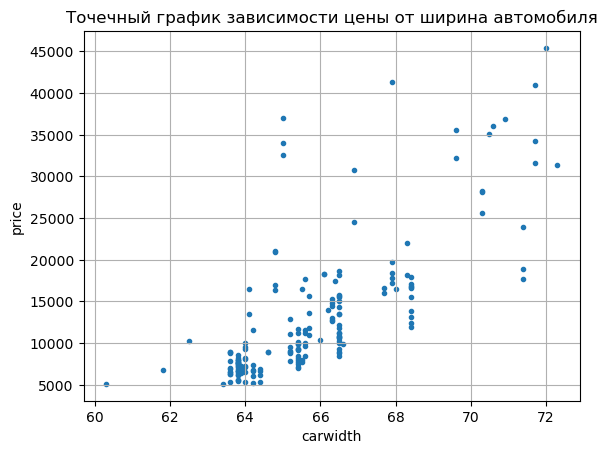

In [13]:
# смотрим зависимости цены от ширина автомобиля
x = dataset['carwidth'].values
y = dataset['price'].values

plt.xlabel('carwidth')
plt.ylabel('price')
plt.title('Точечный график зависимости цены от ширина автомобиля')
plt.grid(True)
plt.scatter(x, y, marker='.')

print("\nКорреляция Пирсона: ")
corr, p_value = pearsonr(dataset['price'], dataset['carwidth'])
print(corr, p_value)

print("\nКорреляция Спирмена: ")
corr, p_value = spearmanr(dataset['price'], dataset['carwidth'])
print(corr, p_value)

print("\nКорреляция Тау Кендалла: ")
corr, p_value = kendalltau(dataset['price'], dataset['carwidth'])
print(corr, p_value)

In [14]:
print("\nМатематическое ожидание: ")
print(st.mean(dataset['price']))

print("\nСредневзвешенное значение: ")
print(np.average(dataset['price']))

print("\nМедиана: ", st.median(dataset['price']))
print("Медиана меньшее среднее значение: ", st.median_low(dataset['price']))
print("Медиана большее среднее значение: ", st.median_high(dataset['price']))

print("\nМинимум: ", np.min(dataset['price']))
print("Максимум: ", np.max(dataset['price']))


Математическое ожидание: 
13284.375927777777

Средневзвешенное значение: 
13284.375927777777

Медиана:  10221.5
Медиана меньшее среднее значение:  10198.0
Медиана большее среднее значение:  10245.0

Минимум:  5118.0
Максимум:  45400.0


In [15]:
print("\nМатематическое ожидание: ")
print(st.mean(dataset['horsepower']))

print("\nСредневзвешенное значение: ")
print(np.average(dataset['horsepower']))

print("\nМедиана: ", st.median(dataset['horsepower']))
print("Медиана меньшее среднее значение: ", st.median_low(dataset['horsepower']))
print("Медиана большее среднее значение: ", st.median_high(dataset['horsepower']))

print("\nМинимум: ", np.min(dataset['horsepower']))
print("Максимум: ", np.max(dataset['horsepower']))


Математическое ожидание: 
104.93333333333334

Средневзвешенное значение: 
104.93333333333334

Медиана:  95.0
Медиана меньшее среднее значение:  95
Медиана большее среднее значение:  95

Минимум:  48
Максимум:  288


In [16]:
print("\nМатематическое ожидание: ")
print(st.mean(dataset['wheelbase']))

print("\nСредневзвешенное значение: ")
print(np.average(dataset['wheelbase']))

print("\nМедиана: ", st.median(dataset['wheelbase']))
print("Медиана меньшее среднее значение: ", st.median_low(dataset['wheelbase']))
print("Медиана большее среднее значение: ", st.median_high(dataset['wheelbase']))

print("\nМинимум: ", np.min(dataset['wheelbase']))
print("Максимум: ", np.max(dataset['wheelbase']))


Математическое ожидание: 
98.39944444444444

Средневзвешенное значение: 
98.39944444444446

Медиана:  96.5
Медиана меньшее среднее значение:  96.5
Медиана большее среднее значение:  96.5

Минимум:  86.6
Максимум:  120.9


In [17]:
print("\nМатематическое ожидание: ")
print(st.mean(dataset['carwidth']))

print("\nСредневзвешенное значение: ")
print(np.average(dataset['carwidth']))

print("\nМедиана: ", st.median(dataset['carwidth']))
print("Медиана меньшее среднее значение: ", st.median_low(dataset['carwidth']))
print("Медиана большее среднее значение: ", st.median_high(dataset['carwidth']))

print("\nМинимум: ", np.min(dataset['carwidth']))
print("Максимум: ", np.max(dataset['carwidth']))


Математическое ожидание: 
65.82722222222222

Средневзвешенное значение: 
65.82722222222222

Медиана:  65.4
Медиана меньшее среднее значение:  65.4
Медиана большее среднее значение:  65.4

Минимум:  60.3
Максимум:  72.3


In [18]:
# мода
dataset.mode(axis=0, numeric_only=True, dropna=True).iloc[0]

symboling        0.00
wheelbase       94.50
carlength      157.30
carwidth        63.80
carheight       50.80
curbweight    2385.00
enginesize      92.00
boreratio        3.62
horsepower      68.00
price         5572.00
Name: 0, dtype: float64